In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

## Definindo o Portfolio:

In [9]:
ativos = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'TAEE11.SA', 'EGIE3.SA', 'WEGE3.SA', 'ABEV3.SA', 'JBSS3.SA']

portfolio = pd.DataFrame()

for ativo in ativos:
    portfolio[ativo] = yf.download(ativo, period='5y')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Analisando o Portfolio:

In [10]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1240 entries, 2016-07-19 to 2021-07-19
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PETR4.SA   1240 non-null   float64
 1   VALE3.SA   1240 non-null   float64
 2   ITUB4.SA   1240 non-null   float64
 3   TAEE11.SA  1240 non-null   float64
 4   EGIE3.SA   1240 non-null   float64
 5   WEGE3.SA   1240 non-null   float64
 6   ABEV3.SA   1240 non-null   float64
 7   JBSS3.SA   1240 non-null   float64
dtypes: float64(8)
memory usage: 87.2 KB


In [11]:
portfolio.tail()

,PETR4.SA,VALE3.SA,ITUB4.SA,TAEE11.SA,EGIE3.SA,WEGE3.SA,ABEV3.SA,JBSS3.SA
Date,,,,,,,,
2021-07-13,27.900000,115.750000,29.870001,37.740002,39.549999,35.180000,17.799999,29.330000
2021-07-14,27.670000,115.120003,29.910000,38.060001,39.689999,35.009998,17.910000,29.420000
2021-07-15,27.080000,115.480003,29.549999,37.939999,40.000000,34.919998,17.620001,28.940001
2021-07-16,26.700001,113.400002,29.070000,38.200001,39.680000,34.290001,17.430000,28.620001
2021-07-19,26.010000,110.839996,28.820000,38.029999,39.139999,34.090000,17.010000,28.670000


## Plotagem dos Ativos usando "Linechart":

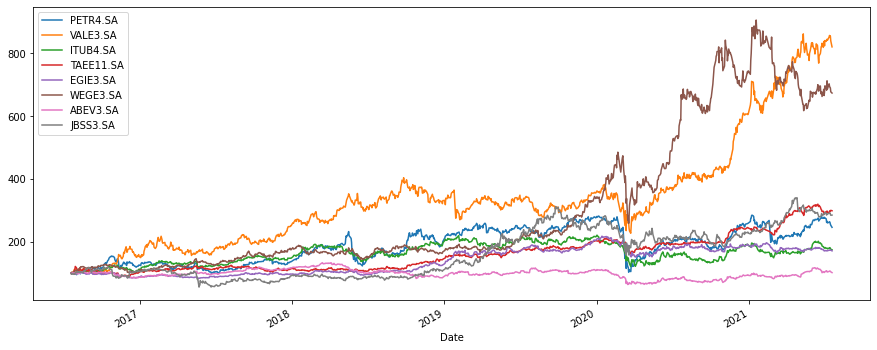

In [12]:
(portfolio / portfolio.iloc[0] * 100).plot(figsize=(15,6))
plt.show()

## Calculando o Retorno do Portfolio:

In [13]:
# retorno diário (só serve como insumo produtivo da conta, não tem valor científico por si só)
retorno_d = (portfolio / portfolio.shift(1)) -1  # aplicação da fórmula: (pT/p0)*100
retorno_d.tail()

,PETR4.SA,VALE3.SA,ITUB4.SA,TAEE11.SA,EGIE3.SA,WEGE3.SA,ABEV3.SA,JBSS3.SA
Date,,,,,,,,
2021-07-13,0.006131,0.005909,0.006063,0.009361,-0.002522,-0.011242,0.007927,0.002735
2021-07-14,-0.008244,-0.005443,0.001339,0.008479,0.003540,-0.004832,0.006180,0.003069
2021-07-15,-0.021323,0.003127,-0.012036,-0.003153,0.007811,-0.002571,-0.016192,-0.016315
2021-07-16,-0.014032,-0.018012,-0.016244,0.006853,-0.008000,-0.018041,-0.010783,-0.011057
2021-07-19,-0.025843,-0.022575,-0.008600,-0.004450,-0.013609,-0.005833,-0.024096,0.001747


In [14]:
# array com distribuição de pesos do portfolio
peso = np.array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [15]:
# retorno anual
retorno_a = retorno_d.mean() * 251
# 251 dias úteis em média em SP
retorno_a

PETR4.SA     0.304552
VALE3.SA     0.516852
ITUB4.SA     0.166034
TAEE11.SA    0.250329
EGIE3.SA     0.140127
WEGE3.SA     0.453639
ABEV3.SA     0.047447
JBSS3.SA     0.337131
dtype: float64

In [25]:
# calcula o produto do vetor ou matriz usando np.dot
pfolio_1 = str(round(np.dot(retorno_a, peso), 6) * 100) + ' %'
print("Com distribuição equânime dos recursos, temos um retorno anual médio de: " + pfolio_1)

Com distribuição equânime dos recursos, temos um retorno anual médio de: 27.7014 %


In [18]:
# Redistribuição de pesos com enfoque em distribuição de dividendos
peso_2 = np.array([0.025, 0.225, 0.225, 0.225, 0.125, 0.025, 0.125, 0.025])

In [26]:
pfolio_2 = str(round(np.dot(retorno_a, peso_2), 6) * 100) + ' %'
print(pfolio_2)

26.0803 %
